In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### install

In [ ]:
pip install biosppy wfdb hrv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=236593 sha256=03619f4dc2c998c2cd11140c890b1c9d6b4d2397ad0b24a2f8a73520ff56d4b1
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64213 sha256=1aa34b3109605ce977edc7f75a2eca67d1e9708dc83ad3eab2cea31cf55dbac1
  Stored in directory: /root/.cache/pip/wheels/c5/a3/df/e8e19f6f1674c2b0574ccc1a156292b599709eaa4feeea0fcf
Successfully built spectrum easydev


In [ ]:
pip install spectrum

## Train data & Test data

In [ ]:
import pickle
import pandas as pd

In [ ]:
# train pickle 파일 open
with open("/apnea-ecg-develop.pkl", "rb") as f:
    loaded_data = pickle.load(f)

print(loaded_data)

OrderedDict([('a01', array([[ 28.70140226,  74.70740212,  27.        , ...,  20.32272925,
        103.67920978,   0.        ],
       [ 28.26520534,  64.7465289 ,  25.        , ...,  20.01259893,
         89.35167538,   0.        ],
       [ 27.34939261,  63.48794024,  22.        , ...,  19.36476787,
         87.67236097,   0.        ],
       ...,
       [ 54.41626198, 179.76604611,  49.        , ...,  38.5421775 ,
        251.28900339,   1.        ],
       [ 52.92725667, 165.34878055,  49.        , ...,  37.47109731,
        230.8167137 ,   1.        ],
       [ 45.53592262, 152.8318151 ,  50.        , ...,  32.23571552,
        213.71940965,   1.        ]])), ('a02', array([[  7.63358402,  22.50494753,   0.        , ...,   5.40341741,
         31.36476377,   0.        ],
       [ 10.23244694,  37.09515609,   2.        , ...,   7.24421325,
         51.95789242,   0.        ],
       [ 22.76958202,  59.95455842,   8.        , ...,  16.12016519,
         83.24204721,   0.        ],
  

In [ ]:
# test pickle 파일 open
with open("/test.pkl", "rb") as f:
    loaded_data_test = pickle.load(f)

print(loaded_data_test)

OrderedDict([('x01', array([[ 12.98647946,  38.05225441,   0.        , ...,   9.19518247,
         53.02260604,   0.        ],
       [ 12.83009197,  48.2324009 ,   0.        , ...,   9.0843514 ,
         67.60328064,   0.        ],
       [ 12.56895872,  53.83952919,   0.        , ...,   8.89816301,
         75.6188634 ,   0.        ],
       ...,
       [ 28.14324857, 106.56562635,  22.        , ...,  19.92669208,
        149.38337385,   0.        ],
       [ 24.8478218 , 102.63601128,  16.        , ...,  17.59074935,
        144.07937799,   0.        ],
       [ 19.43203969,  92.24886202,   9.        , ...,  13.75603159,
        129.73232705,   0.        ]])), ('x02', array([[ 15.70209602,  51.95401685,   2.        , ...,  11.11621777,
         72.62829639,   0.        ],
       [ 24.45607823,  59.56204873,   5.        , ...,  17.29781649,
         82.4382244 ,   0.        ],
       [ 30.10611453,  66.75541135,   6.        , ...,  21.31237301,
         91.96930274,   0.        ],
  

In [ ]:
# train, test data 데이터프레임으로 변환 (oderedDict -> DataFrame)

# train dataframe 생성
train_df = pd.DataFrame(columns=[
    "recording", "rmssd", "sdnn", "nn50", "sdsd", "pnn50", "mrri", "mhr",
    "vlf_rri", "lf_rri", "hf_rri", "lf_hf_rri", "lfnu_rri", "hfnu_rri",
    "vlf_edr", "lf_edr", "hf_edr", "lf_hf_edr", "lfnu_edr", "hfnu_edr",
    "sd1", "sd2", "label"
])

for recording, data in loaded_data.items():
    for row_data in data:
        row_data_list = [recording] + row_data.tolist()
        train_df = train_df.append(pd.Series(row_data_list, index=train_df.columns), ignore_index=True)


# test dataframe 생성
test_df = pd.DataFrame(columns=[
    "recording", "rmssd", "sdnn", "nn50", "sdsd", "pnn50", "mrri", "mhr",
    "vlf_rri", "lf_rri", "hf_rri", "lf_hf_rri", "lfnu_rri", "hfnu_rri",
    "vlf_edr", "lf_edr", "hf_edr", "lf_hf_edr", "lfnu_edr", "hfnu_edr",
    "sd1", "sd2", "label"
])

for recording, data in loaded_data_test.items():
    for row_data in data:
        row_data_list = [recording] + row_data.tolist()
        test_df = test_df.append(pd.Series(row_data_list, index=test_df.columns), ignore_index=True)

# train : test = 7 : 3 = 35(명) : 9(명)
test_df = test_df[test_df['recording'].isin(['x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09'])]

In [ ]:
train_df.head()

,recording,rmssd,sdnn,nn50,sdsd,pnn50,mrri,mhr,vlf_rri,lf_rri,...,hfnu_rri,vlf_edr,lf_edr,hf_edr,lf_hf_edr,lfnu_edr,hfnu_edr,sd1,sd2,label
0,a01,28.701402,74.707402,27.0,28.740679,7.356948,814.604905,74.294370,0.375892,0.460337,...,26.240752,0.227704,0.303386,0.468910,0.647002,39.283634,60.716366,20.322729,103.679210,0.0
1,a01,28.265205,64.746529,25.0,28.302089,6.720430,802.553763,75.273469,0.362616,0.483424,...,24.155004,0.210607,0.304830,0.484563,0.629082,38.615738,61.384262,20.012599,89.351675,0.0
2,a01,27.349393,63.487940,22.0,27.385917,5.882353,798.689840,75.617387,0.347490,0.495060,...,24.129826,0.186422,0.350587,0.462991,0.757223,43.092032,56.907968,19.364768,87.672361,0.0
3,a01,23.657681,63.756201,16.0,23.687779,4.177546,780.261097,77.428287,0.419729,0.446351,...,23.078851,0.103726,0.363423,0.532851,0.682036,40.548246,59.451754,16.749789,88.595433,0.0
4,a01,22.842103,69.898461,14.0,22.871513,3.617571,772.428941,78.328820,0.465268,0.398606,...,25.456847,0.132070,0.339373,0.528557,0.642074,39.101395,60.898605,16.172602,97.519416,0.0


In [ ]:
len(train_df)

16709

## 데이터 불균형 처리 SMOTE (사용하지 않음)

In [ ]:
# label 값의 비율 확인
train_df['label'].value_counts()

0.0    10236
1.0     6473
Name: label, dtype: int64

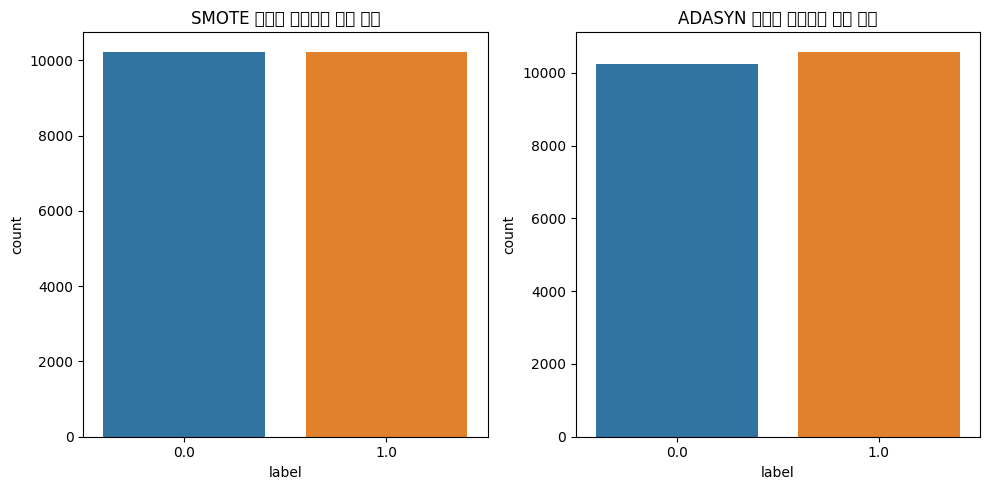

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
import seaborn as sns
import matplotlib.pyplot as plt

# 피처와 라벨 분리
X_train = train_df.drop(columns = ['recording', 'label', "rmssd", "sdsd", "hf_rri", "hfnu_rri", "lf_hf_edr", "hfnu_edr"])
y_train = train_df['label']  #apnea 유무

# SMOTE 증강
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# ADASYN 증강
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# 각각의 증강된 데이터를 시각화하여 확인
plt.figure(figsize=(10, 5))

y_train_smote_df = pd.DataFrame({'label': y_train_smote})
plt.subplot(1, 2, 1)
sns.countplot(data=y_train_smote_df, x='label')
plt.title("SMOTE 증강된 데이터의 라벨 분포")

y_train_adasyn_df = pd.DataFrame({'label': y_train_adasyn})
plt.subplot(1, 2, 2)
sns.countplot(data=y_train_adasyn_df, x='label')
plt.title("ADASYN 증강된 데이터의 라벨 분포")

plt.tight_layout()
plt.show()

SMOTE 방식 채택

In [ ]:
# train, test 준비 완료
X_train_scaled = X_train_smote
y_train_scaled = y_train_smote

X_test = test_df.drop(columns = ['recording', 'label', "rmssd", "sdsd", "hf_rri", "hfnu_rri", "lf_hf_edr", "hfnu_edr"])
y_test = test_df['label']  #apnea 유무

SMOTE 방식을 사용하여 불균형 처리 후 모델을 돌려보았으나, 불균형처리하지 않은 데이터보다 오히려 좋지 않은 결과를 보여 사용하지 않기로 결정함

# Modeling

##import library

In [ ]:
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

##Train-Test

In [ ]:
# featureCreation 파일에서 확인한대로 feature selection

# Train 데이터 불러오기 및 전처리
X_train = train_df.drop(columns=['recording', 'label', "rmssd", "sdsd", "hf_rri", "hfnu_rri", "lf_hf_edr", "hfnu_edr"])
y_train = train_df['label']

# Test 데이터 불러오기 및 전처리
X_test = test_df.drop(columns=['recording', 'label', "rmssd", "sdsd", "hf_rri", "hfnu_rri", "lf_hf_edr", "hfnu_edr"])
y_test = test_df['label']

##Gradient Boosting Classifier -최종선택

In [ ]:
# Gradient Boosting Classifier 모델 학습
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100) #learning_rate: 학습률, n_estimators: 생성할 트리의 개수

gb.fit(X_train, y_train)

# 예측 및 평가
gb_pred_train = gb.predict(X_train)
gb_pred_test = gb.predict(X_test)

print("Gradient Boosting Classifier train", accuracy_score(y_train, gb_pred_train))
print("Gradient Boosting Classifier test", accuracy_score(y_test, gb_pred_test))

Gradient Boosting Classifier train 0.877491172422048
Gradient Boosting Classifier test 0.8494598942771776


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 그리드 검색을 위한 매개 변수 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],   # 생성할 트리의 개수
    'learning_rate': [0.01, 0.1, 0.2]  # 학습률
}

# GradientBoostingClassifier instance 생성
model_gb = GradientBoostingClassifier(random_state=42)

# Grid Search instance 생성
grid_search = GridSearchCV(model_gb, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the Grid Search on the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model from Grid Search
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_gb_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy: 0.7869414171463085
Test Set Accuracy: 0.8494598942771776


In [ ]:
print(classification_report(y_test, gb_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.82      0.87      2716
         1.0       0.75      0.91      0.82      1635

    accuracy                           0.85      4351
   macro avg       0.84      0.86      0.85      4351
weighted avg       0.86      0.85      0.85      4351



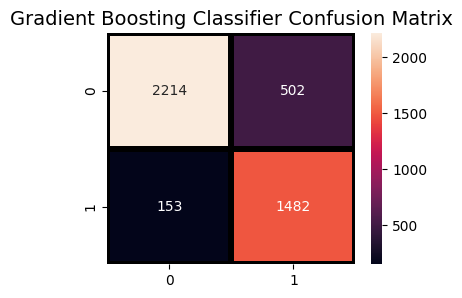

In [ ]:
# Gradient Boosting Classifier Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

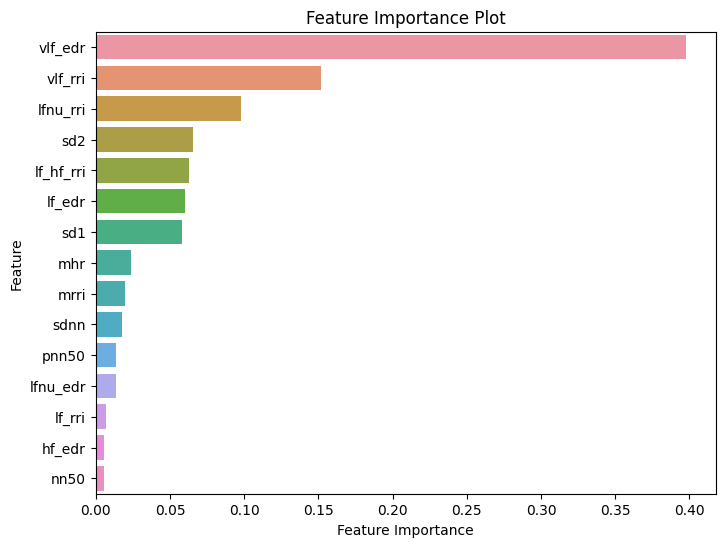

Feature Importance:
sdnn: 0.0174
nn50: 0.0055
pnn50: 0.0138
mrri: 0.0200
mhr: 0.0234
vlf_rri: 0.1518
lf_rri: 0.0069
lf_hf_rri: 0.0630
lfnu_rri: 0.0981
vlf_edr: 0.3979
lf_edr: 0.0601
hf_edr: 0.0056
lfnu_edr: 0.0133
sd1: 0.0581
sd2: 0.0653


In [ ]:
# Gradient Boosting Classifeir Feature Importance

from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

feature_importances = gb.feature_importances_

# 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

print("Feature Importance:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

## (참고)시도해보았던 모델 중 성능이 비교적 높게 나왔던 모델 코드

##LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# LightGBM 모델 학습
lgbm_reg = lgb.LGBMClassifier(booster = 'gbtree', colsample_bytree = 0.75,
                          learning_rate = 0.1, max_depth = 3, alpha = 10, n_estimators= 100)  #하이퍼파라미터 조정
lgbm_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = lgbm_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Accuracy 출력
print("Accuracy (LightGBM):", accuracy)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Info] Number of positive: 6473, number of negative: 10236
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3696
[LightGBM] [Info] Number of data points in the train set: 16709, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387396 -> initscore=-0.458271
[LightGBM] [Info] Start training from score -0.458271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      2716
         1.0       0.73      0.91      0.81      1635

    accuracy                           0.84      4351
   macro avg       0.83      0.85      0.84      4351
weighted avg       0.86      0.84      0.84      4351



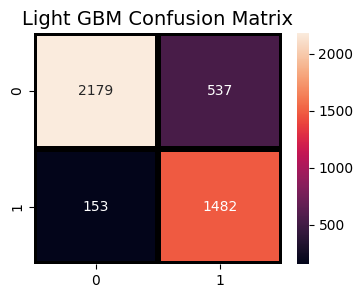

In [ ]:
# Light GBM Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Light GBM Confusion Matrix",fontsize=14)
plt.show()

##AdaBoost

In [ ]:
# AdaBoost 모델 학습
a_model = AdaBoostClassifier(n_estimators=50)

a_model.fit(X_train,y_train)

# 예측 및 평가
a_preds = a_model.predict(X_test)

print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8349804642610894

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      2716
         1.0       0.73      0.89      0.80      1635

    accuracy                           0.83      4351
   macro avg       0.83      0.85      0.83      4351
weighted avg       0.85      0.83      0.84      4351



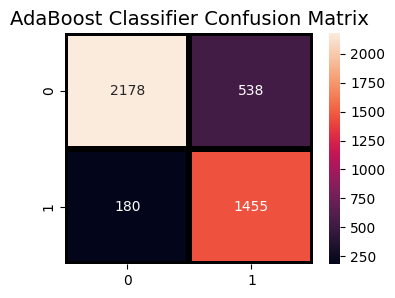

In [ ]:
# AdaBoost Classifier Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

##Random Forest

In [ ]:
# Random Forest 모델 학습
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)  #하이퍼파라미터 조정
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ("Random Forest accuracy", metrics.accuracy_score(y_test, prediction_test))

Random Forest accuracy 0.8361296253734773


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      2716
         1.0       0.73      0.89      0.80      1635

    accuracy                           0.84      4351
   macro avg       0.83      0.85      0.83      4351
weighted avg       0.85      0.84      0.84      4351



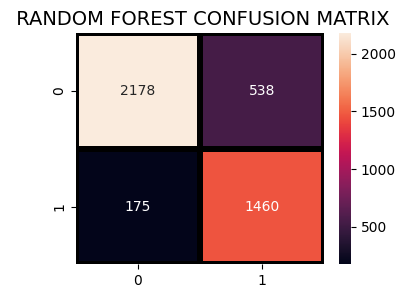

In [ ]:
# Random Forest Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

##LDA 적합

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA 모델 학습
cld=LinearDiscriminantAnalysis(store_covariance=True)

cld.fit(X_train,y_train)

# 예측 및 평가
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)

# Accuracy
print("LDA train", accuracy_score(y_train, y_train_pred))
print("LDA test", accuracy_score(y_test, y_test_pred))

LDA train 0.8275779520019151
LDA test 0.8398069409331188


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2716
         1.0       0.76      0.85      0.80      1635

    accuracy                           0.84      4351
   macro avg       0.83      0.84      0.83      4351
weighted avg       0.85      0.84      0.84      4351



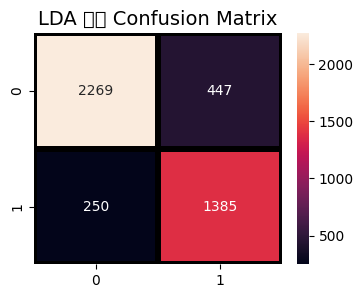

In [ ]:
# LDA 적합 Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LDA 적합 Confusion Matrix",fontsize=14)
plt.show()

##LDA 차원 축소 후 로지스틱 회귀

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

scov=np.cov(X_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[4.83487813e+00 3.46721970e+00 2.06947314e+00 1.56931655e+00
 1.30781279e+00 9.68846755e-01 3.92830739e-01 2.36112041e-01
 9.41582520e-02 3.32476464e-02 1.20533930e-02 1.07113610e-02
 4.17648553e-03 6.07915946e-05 1.10425550e-16]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 모델 학습
lda=LDA(n_components=1)

X_train_lda=lda.fit_transform(X_train_std, y_train)
X_test_lda=lda.transform(X_test_std)

# 로지스틱 모델 학습
lr=LogisticRegression()

lr.fit(X_train_lda, y_train)

# 예측 및 평가
y_train_pred=lr.predict(X_train_lda)
y_test_pred=lr.predict(X_test_lda)

# Accuracy
print("Accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("Confusion Matrix\n", metrics.confusion_matrix(y_test,y_test_pred))

Accuracy 0.8280567358908373
Accuracy 0.8381981153757757
Confusion Matrix
 [[2248  468]
 [ 236 1399]]


##신경망(Neural Network)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


# 데이터 전처리
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 신경망 모델 생성 및 학습
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8372787864858653


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2716
         1.0       0.84      0.70      0.76      1635

    accuracy                           0.84      4351
   macro avg       0.84      0.81      0.82      4351
weighted avg       0.84      0.84      0.83      4351



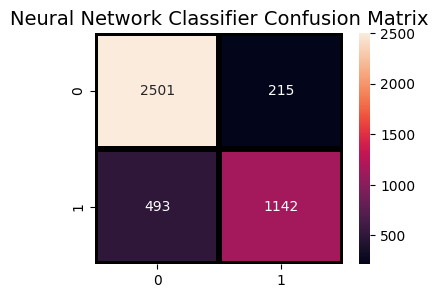

In [ ]:
# Neural Network Classifier Confusion Matrix

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Neural Network Classifier Confusion Matrix",fontsize=14)
plt.show()